In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import igraph

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.0 anndata==0.7.5 umap==0.5.1 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
results_file = 'results/210816_CS20_analysis.h5ad'

In [4]:
adata = sc.read_h5ad('write/CS20_processing.h5ad')           

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


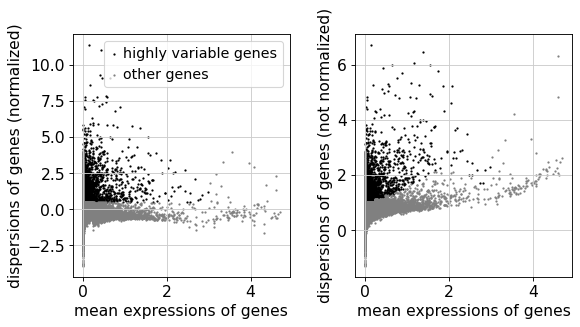

In [6]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [7]:
adata.raw = adata

In [8]:
adata = adata[:, adata.var.highly_variable]

/home/analysis/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [9]:
adata

View of AnnData object with n_obs × n_vars = 7028 × 3019
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'doublet_info_colors', 'log1p', 'hvg'

In [10]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'])

regressing out ['total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb']
    sparse input is densified and may lead to high memory use
    finished (0:00:13)


In [11]:
sc.pp.scale(adata, max_value=10)

In [12]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
/home/analysis/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
    with n_comps=50
    finished (0:00:01)


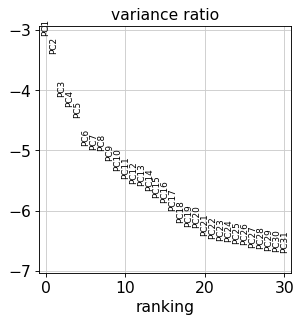

In [13]:
sc.pl.pca_variance_ratio(adata, log=True)

In [14]:
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 7028 × 3019
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'doublet_info_colors', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [15]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [16]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


In [17]:
sc.tl.leiden(adata, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(adata, resolution = 0.8, key_added = "leiden_0.8")
sc.tl.leiden(adata, resolution = 1.0, key_added = "leiden_1.0")
sc.tl.leiden(adata, resolution = 1.2, key_added = "leiden_1.2")
sc.tl.leiden(adata, resolution = 1.4, key_added = "leiden_1.4")

running Leiden clustering
    finished: found 21 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 22 clusters and added
    'leiden_0.8', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 25 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 27 clusters and added
    'leiden_1.2', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 32 clusters and added
    'leiden_1.4', the cluster labels (adata.obs, categorical) (0:00:00)


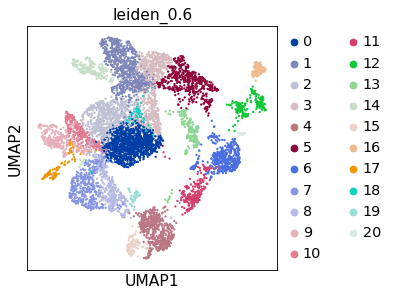

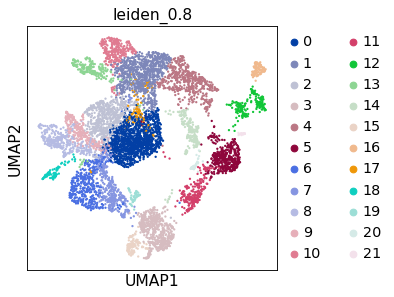

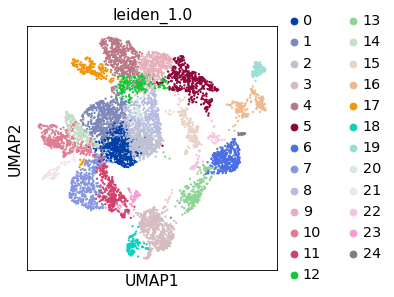

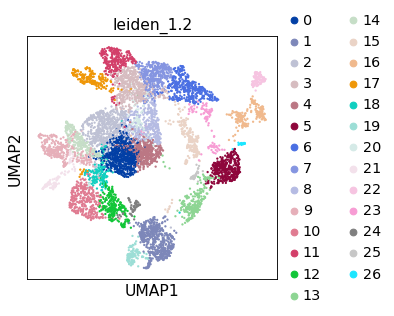

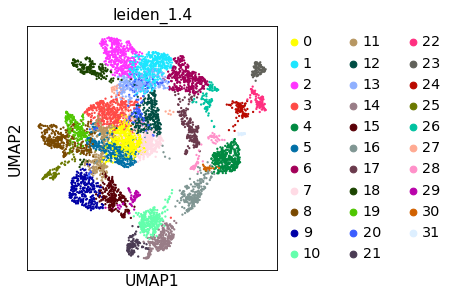

In [18]:
sc.pl.umap(adata, color='leiden_0.6')
sc.pl.umap(adata, color='leiden_0.8')
sc.pl.umap(adata, color='leiden_1.0')
sc.pl.umap(adata, color='leiden_1.2')
sc.pl.umap(adata, color='leiden_1.4')

ranking genes
    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:09)


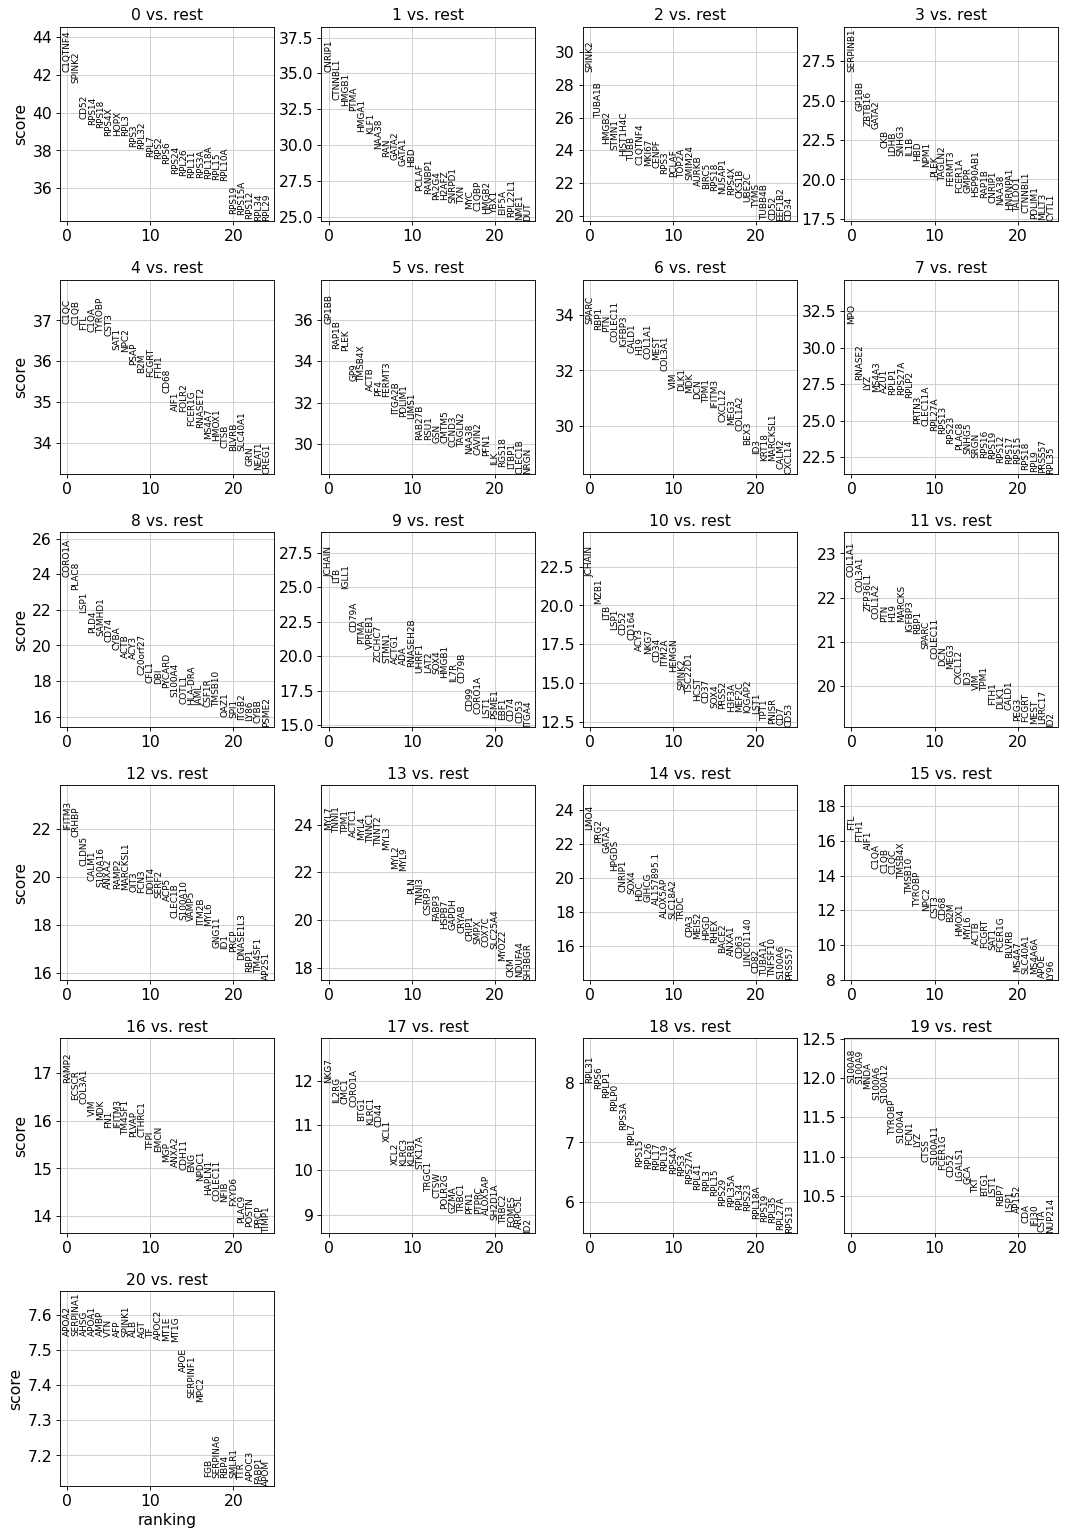

In [19]:
sc.tl.rank_genes_groups(adata, 'leiden_0.6', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "wilcoxon")

In [20]:
group6 = (sc.get.rank_genes_groups_df(adata, group="6", key = "wilcoxon")
          .set_index("names", drop=False))

In [21]:
group6.head()

,names,scores,logfoldchanges,pvals,pvals_adj
names,,,,,
SPARC,SPARC,33.664112,5.710546,1.938164e-248,3.995137e-244
RBP1,RBP1,33.448280,6.014547,2.726275e-245,2.809836e-241
PTN,PTN,33.399712,6.613404,1.384222e-244,9.510992e-241
COLEC11,COLEC11,33.039688,6.853958,2.187901e-239,1.127480e-235
IGFBP3,IGFBP3,32.859924,7.771086,8.218720e-237,3.388249e-233


In [22]:
group6.to_csv('210816_CS20_group6_wilcoxon.tsv', sep='\t', index = False)

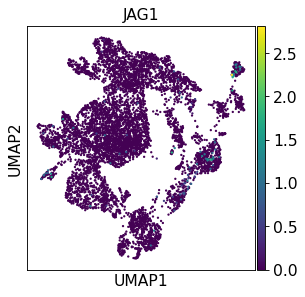

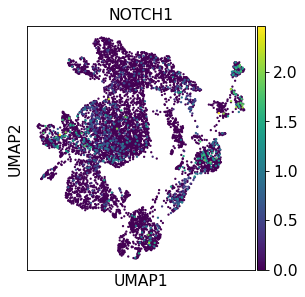

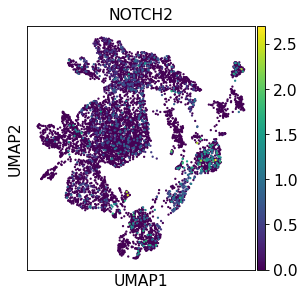

In [23]:
sc.pl.umap(adata, color='JAG1')
sc.pl.umap(adata, color='NOTCH1')
sc.pl.umap(adata, color='NOTCH2')

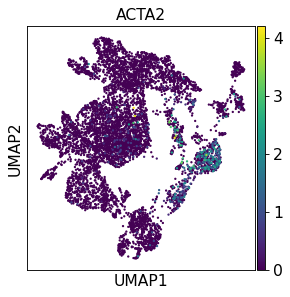

In [24]:
sc.pl.umap(adata, color='ACTA2')

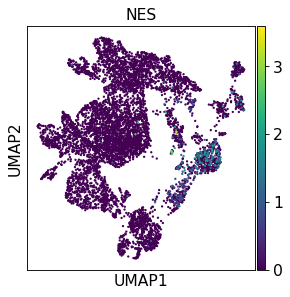

In [25]:
sc.pl.umap(adata, color='NES')

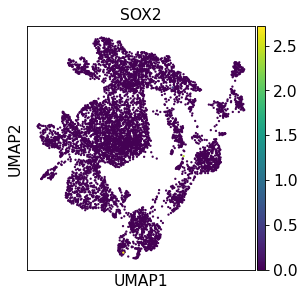

In [26]:
sc.pl.umap(adata, color='SOX2')

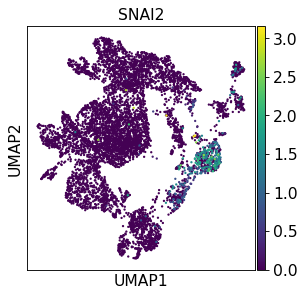

In [27]:
sc.pl.umap(adata, color='SNAI2')

In [28]:
adata.obs.groupby("leiden_0.6").apply(len)

leiden_0.6
0     1100
1      726
2      620
3      603
4      531
5      484
6      466
7      398
8      325
9      273
10     247
11     231
12     199
13     195
14     190
15     103
16      99
17      97
18      74
19      48
20      19
dtype: int64

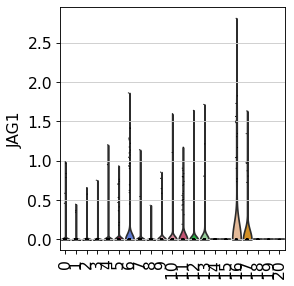

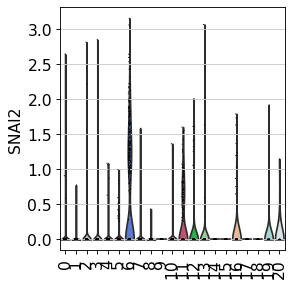

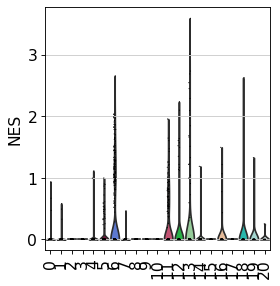

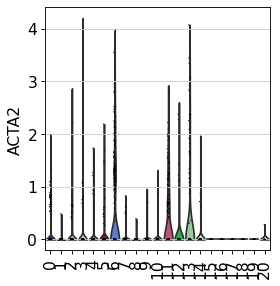

In [29]:
sc.pl.violin(adata, ['JAG1'], groupby='leiden_0.6', rotation = 90)
sc.pl.violin(adata, ['SNAI2'], groupby='leiden_0.6', rotation = 90)
sc.pl.violin(adata, ['NES'], groupby='leiden_0.6', rotation = 90)
sc.pl.violin(adata, ['ACTA2'], groupby='leiden_0.6', rotation = 90)

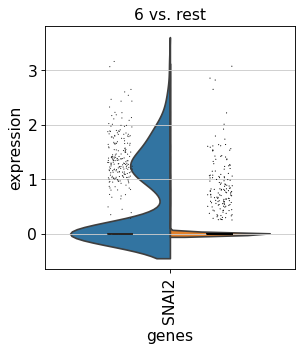

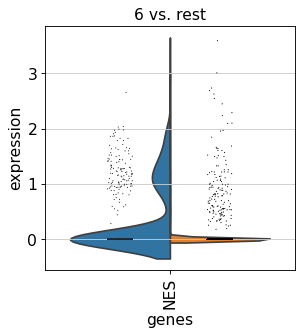

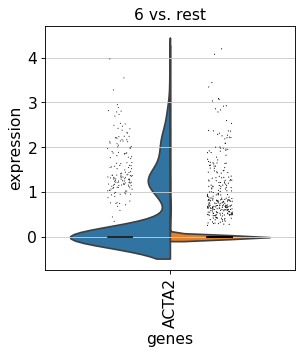

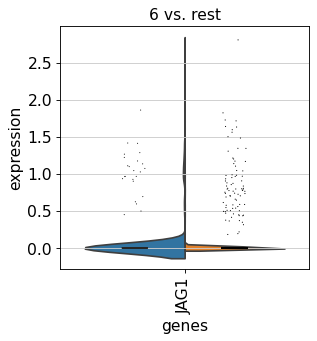

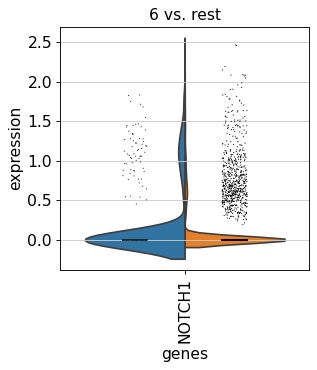

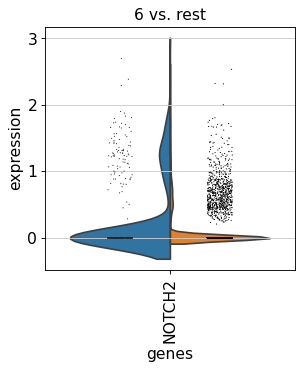

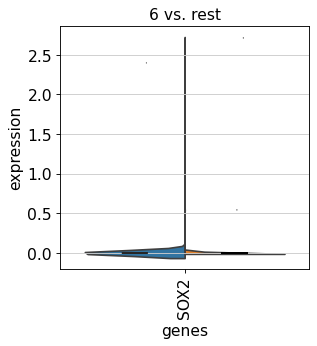

In [30]:
sc.pl.rank_genes_groups_violin(adata, groups='6', gene_names = ['SNAI2'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='6', gene_names = ['NES'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='6', gene_names = ['ACTA2'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='6', gene_names = ['JAG1'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='6', gene_names = ['NOTCH1'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='6', gene_names = ['NOTCH2'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='6', gene_names = ['SOX2'], key = "wilcoxon")

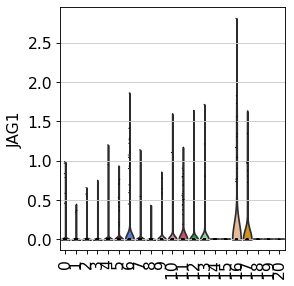

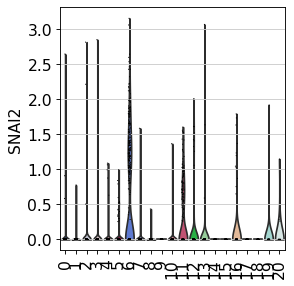

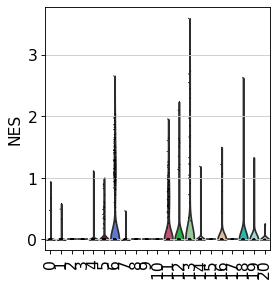

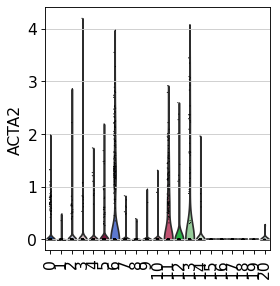

In [31]:
sc.pl.violin(adata, ['JAG1'], groupby='leiden_0.6', rotation = 90)
sc.pl.violin(adata, ['SNAI2'], groupby='leiden_0.6', rotation = 90)
sc.pl.violin(adata, ['NES'], groupby='leiden_0.6', rotation = 90)
sc.pl.violin(adata, ['ACTA2'], groupby='leiden_0.6', rotation = 90)

In [32]:
adata.write(results_file)